In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime 
from pandas import Series
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")



In [0]:
train = pd.read_csv('/content/drive/My Drive/MachineLearning/time_series/Train_SU63ISt.csv')
test = pd.read_csv('/content/drive/My Drive/MachineLearning/time_series/Test_0qrQsBZ.csv')

In [0]:
# make copies 

train_original = train.copy()
test_original = test.copy()


In [144]:
train.columns, test.columns


(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [0]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M' )

### Hypothesis Generation 

- There will be an increase in traffic as the years pass by 
- The traffic will be high from May to October (Tourists)
- Traffic on weekdays will be higher when compared to weekends 
- Traffic during peak hours will be high

### Feature Extraction

In [146]:
train['Datetime']

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
                ...        
18283   2014-09-25 19:00:00
18284   2014-09-25 20:00:00
18285   2014-09-25 21:00:00
18286   2014-09-25 22:00:00
18287   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]

In [0]:
for i in (train, test, test_original, train_original):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['hour'] = i.Datetime.dt.hour

In [148]:
train['day of week'] = train['Datetime'].dt.dayofweek
train['day of week']

0        5
1        5
2        5
3        5
4        5
        ..
18283    3
18284    3
18285    3
18286    3
18287    3
Name: day of week, Length: 18288, dtype: int64

In [0]:
# Values 5 and 6 represent weekends

temp = train['Datetime']

# assign 1 if the day of the week is a weekend and 0 if the day of the week is not a weekend 

def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6: 
    return 1 
  else :
    return 0 

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [150]:
train['weekend']

0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: weekend, Length: 18288, dtype: int64

In [151]:
train.index = train['Datetime']    # indexing the datetime column to get the time period on the X axis
df = train.drop('ID', 1)
df

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [152]:
ts = df['Count']
ts

Datetime
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
                      ... 
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534
Name: Count, Length: 18288, dtype: int64

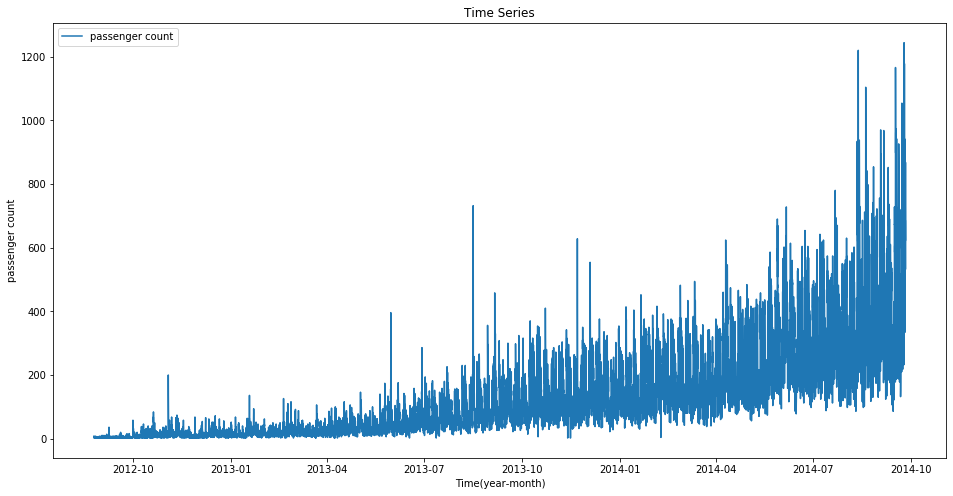

In [153]:
plt.figure(figsize=(16,8))
plt.plot(ts, label='passenger count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('passenger count')
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e the passenger count is increasing with respect to time. We can also see that there are sudden peaks in the data on certain days. This could be due to many reasons(eg: events on that day, etc.)
We will work on the train file for all analysis and use the test file for forecasting.

### Exploratory Data Analysis

Our firs hypothesis was that traffic will increase as the years go by. So let's look at yearly passenger count.

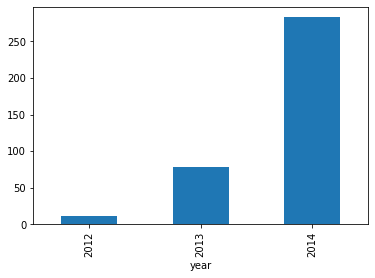

In [154]:
train.groupby('year')['Count'].mean().plot.bar()

We see that there is an exponential increase in the passenger count with an increase in the year

Our second hypothesis was about the increase in traffic from May to October. So let's see the relation between count and month.

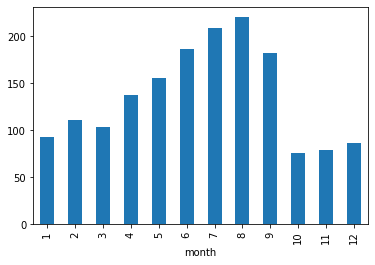

In [155]:
train.groupby('month')['Count'].mean().plot.bar()

We see a decrease in the mean of passenger count in the last three months. This does not look right. Let's look closely at the monthly mean for each year separately

In [156]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

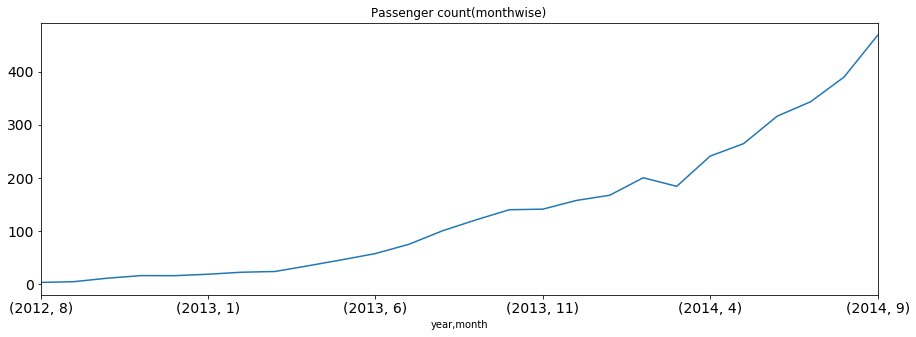

In [157]:
temp.plot(figsize=(15,5), title='Passenger count(monthwise)', fontsize=14)

We see that the months 10,11,12 are not present for the year 2014

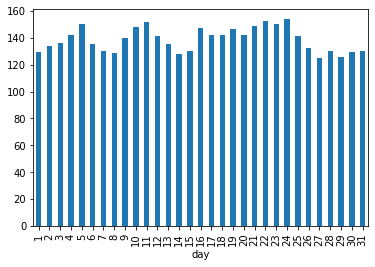

In [158]:
train.groupby('day')['Count'].mean().plot.bar()

The day wise count of passengers does not seem to give us much information 

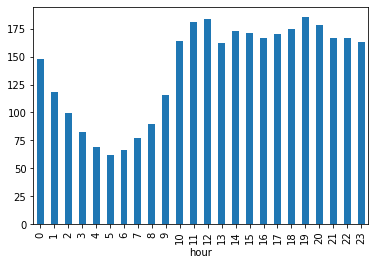

In [159]:
train.groupby('hour')['Count'].mean().plot.bar()

It can be inferred that the peak time is at 7pm then we see a decreasing trend till 5am. After that, passenger count again increases till 11-12pm


Next, let's validate the hypothesis that there are more passengers during weekdays than on weekends 

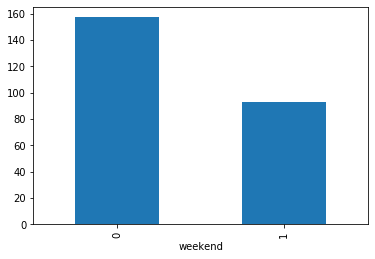

In [160]:
train.groupby('weekend')['Count'].mean().plot.bar()

Now, lets check the passenger count during each day of the week 

0 - Monday
6 - Sunday

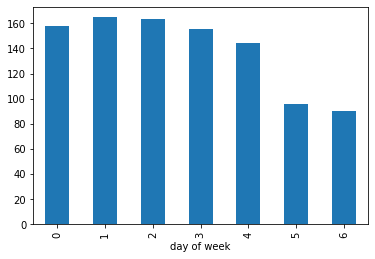

In [161]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above plot, we can infer that the number of passengers during the weekdays is more than those on weekends

In [0]:
train = train.drop('ID', 1)

As we have seen, there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly and monthly to reduce noise 

In [163]:
train

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [164]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

# Hourly time series 
hourly = train.resample('H').mean()
hourly

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [165]:
# Daily time series 
daily = train.resample('D').mean()
daily

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0


In [166]:
# weekly series 
weekly = train.resample('W').mean()
weekly

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-26,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714
...,...,...,...,...,...,...,...
2014-08-31,418.023810,2014.0,8.000000,28.000000,11.5,3.0,0.285714
2014-09-07,446.190476,2014.0,9.000000,4.000000,11.5,3.0,0.285714
2014-09-14,392.297619,2014.0,9.000000,11.000000,11.5,3.0,0.285714


In [167]:
# monthly series 
monthly = train.resample('M').mean()
monthly

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-31,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


Lets look at he hourly, daily, weekly, monthly plot

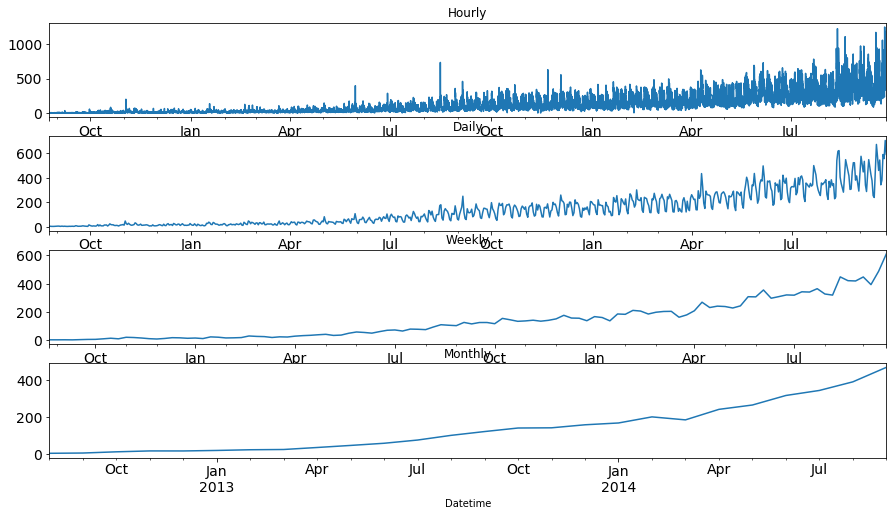

In [168]:
fig, ax = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax = ax[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax = ax[1])
weekly.Count.plot(figsize=(15,8), title='Weekly', fontsize=14, ax = ax[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax = ax[3])
plt.show()

We will work on the daily time series 

In [0]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

In [0]:
# Converting to daily mean 

test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

### Splitting the data into training and validation sets

We will take the last three months as the validation data and the rest for training data. We will take only 3 months as the trend will be the most for them.
The starting date in our data is 25-08-2012 and the ending date is 25-09-2014.

In [0]:
Train = train.ix['2012-08-25':'2014-06-24']
valid = train.ix['2014-06-25':'2014-09-25']

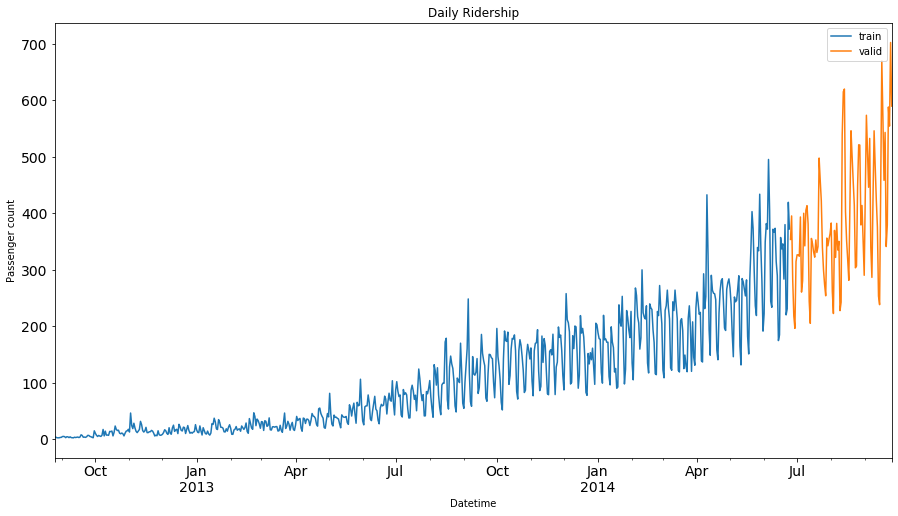

In [172]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()

### Modeling Techniques for forecasting 

  - Naive approach 
  - Moving average 
  - Simple Exponential Smoothing 
  - Holt's Linear Trend model

#### Naive Approach
According to this approach, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

In [173]:
Train

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-06-20,379.916667,2014.0,6.0,20.0,11.5,4.0,0.0
2014-06-21,220.083333,2014.0,6.0,21.0,11.5,5.0,1.0
2014-06-22,230.833333,2014.0,6.0,22.0,11.5,6.0,1.0


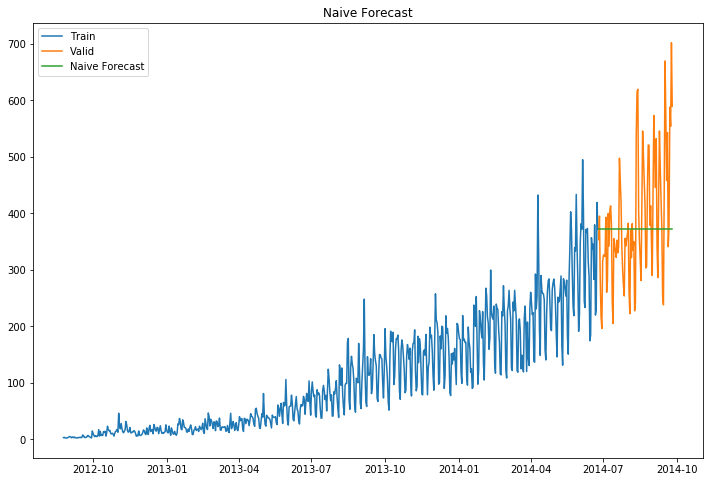

In [174]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

- We can now calculate how accurate our predictions are using rmse(Root Mean Squared Error)
- rmse is the standard deviation of the residuals 
- Residuals are a measure of how far from the regression line data points are 


In [175]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rms

111.79050467496724

We can infer that this method is not suitable for datasets with high variability. We can reduce the error by adopting different techniques.

#### Moving average
In this technique, we take the average of the passenger counts for the last few time periods only.


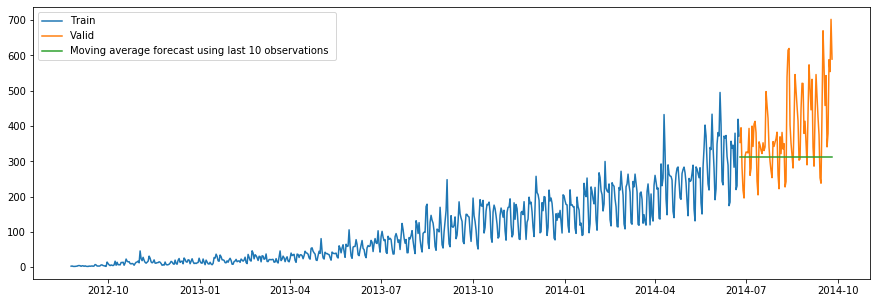

In [176]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]    # average of last 10 observations 
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving average forecast using last 10 observations ')
plt.legend(loc='best')
plt.show()

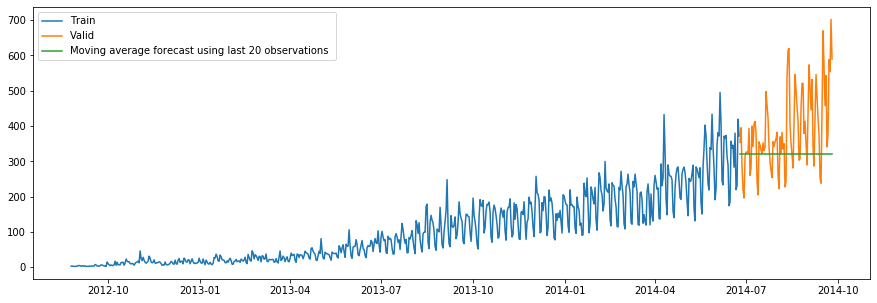

In [177]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving average forecast using last 20 observations ')
plt.legend(loc='best')
plt.show()

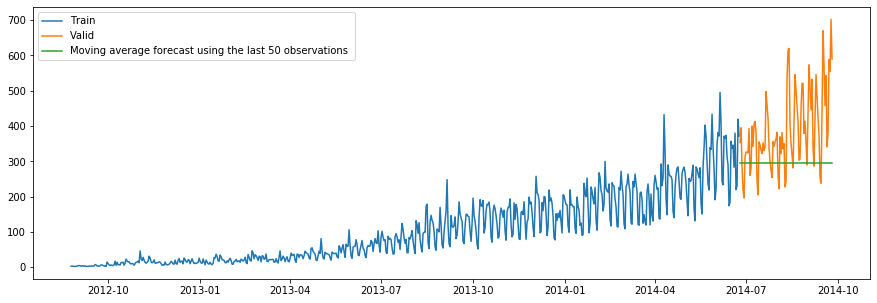

In [178]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving average forecast using the last 50 observations ')
plt.legend(loc='best')
plt.show()

We can see that the predictions are getting weaker as we increase the number of observations 

In [179]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg['moving_avg_forecast']))
rms

144.19175679986802

### Simple Exponential Smoothing
- In this technique, we assign larger weights to more recent observations than to observations in the past.
- The weights decrease exponentially as the observations come from the past, the smallest weights are associated with the oldest observations. 

**NOTE** : If we give the entire weight to the latest observation, this method would be very similar to the naive approach. So, we can say that the naive approach is a type of simple exponential smoothing where the entire weight is given to the latest observation.

Here, the predictions are made by assigning larger weights to the recent values and lesser weights to the old values.

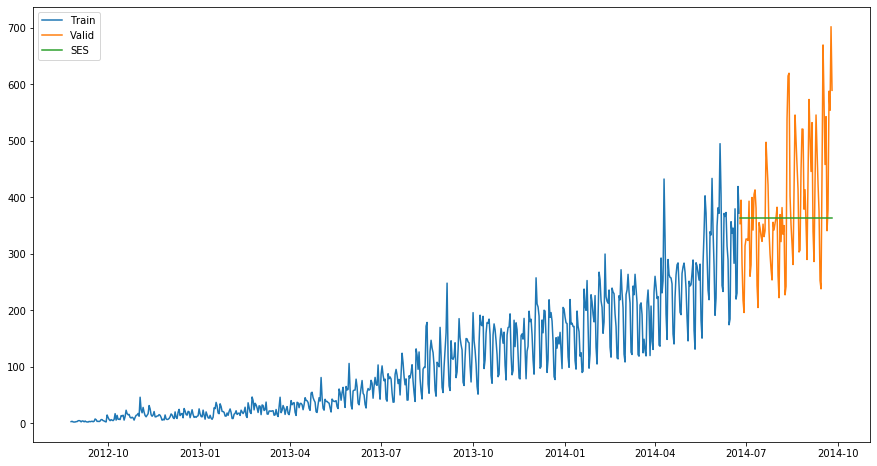

In [180]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(15,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [181]:
rms = sqrt(mean_squared_error(valid['Count'], y_hat_avg['SES']))
rms

113.43708111884514

We can infer that the fit model has improved because of lesser rmse value

###Holt's linear trend model
This method is an extention of the simple exponential smoothing method but takes into account the trend of the dataset. The forecast in this method is a function of the level and the trend.

First, let us visualize the trend, seasonality and error in the series. 

The time series can be decomposed into 4 parts : 
  - Observed, which is the original time series 
  - Trend i.e the increasing or decreasing behaviour of the time series 
  - Seasonal
  - Residual , which is obtained by removing any seasonality or trend in the time series 

  Let us visualize these parts

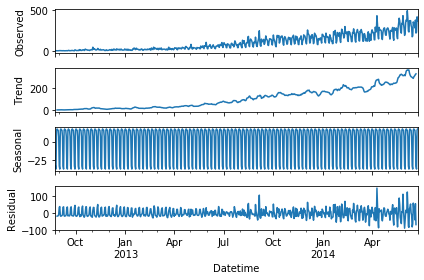

In [182]:
import statsmodels.api as sm 

sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)
plt.show()

We can see an increasing trend in the data. So now, we will build a model on the increasing trend.

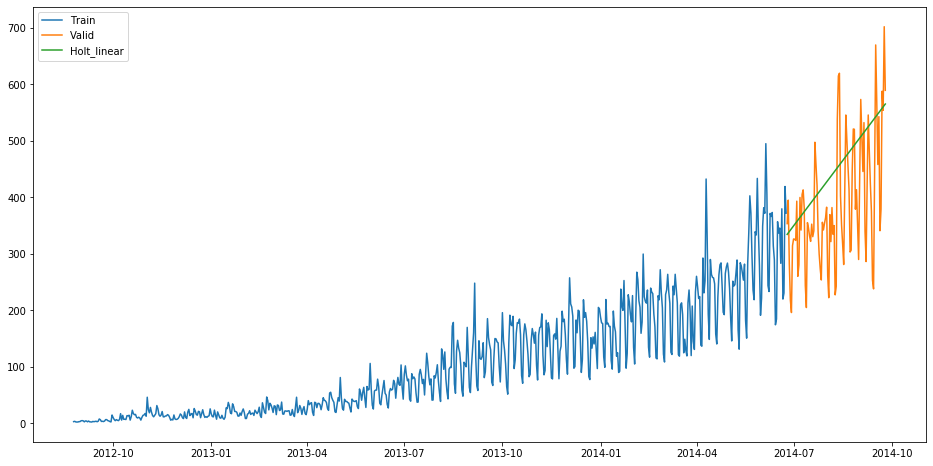

In [183]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

We can see an inclined line here as the model has taken into consideration the trend in the time series.

In [184]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
rmse

112.94278345314041

It can be inferred that the rmse value has decreased.
Now we will predict the passenger count for the test dataset using various models.

### Holt's linear model on daily time series 

In [185]:
submission = pd.read_csv('/content/drive/My Drive/MachineLearning/time_series/sample_submission_LSeus50.csv')
submission

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


In [186]:
test

,ID,year,month,day,hour
Datetime,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5
...,...,...,...,...,...
2015-04-22,23291.5,2015.0,4.0,22.0,11.5
2015-04-23,23315.5,2015.0,4.0,23.0,11.5
2015-04-24,23339.5,2015.0,4.0,24.0,11.5


In [0]:
predict = fit1.forecast(len(test))
test['predict'] = predict

This is for daily predictions. We have to convert these predictions to hourly basis. To do so, we first calculate the ratio of passengers for each hour on each day. Then we will find the average ratio of passengers for every hour and we will get 24 ratios. Then to calculate the hourly predictions, we multiply the daily prediction with the hourly ratio.

In [188]:
# Calculating hourly ratio of count 
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()
train_original

,ID,Datetime,Count,year,month,day,hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07
...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3.415620e-04
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,2.880454e-04
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,2.762403e-04
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,2.282327e-04


In [0]:
# grouping the hourly ratio 
temp = train_original.groupby(['hour'])['ratio'].sum()

# groupby to csv format 
pd.DataFrame(temp, columns=['hour', 'ratio']).to_csv('GROUPby.csv')

In [190]:
temp2 = pd.read_csv('GROUPby.csv')
temp2 = temp2.drop('hour.1',1)
temp2.head()

,hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [191]:
# Merge test and test_original on month, day and year 
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour'] = merge['hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)
# Predicting by merging merge and temp2
prediction = pd.merge(merge, temp2, on='hour', how='left')
prediction

,ID_x,day,predict,ID_y,hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627
5108,23387.5,26.0,866.398583,23396,20,0.053455
5109,23387.5,26.0,866.398583,23397,21,0.049895
5110,23387.5,26.0,866.398583,23398,22,0.050076


In [0]:
prediction['Count'] = prediction['predict']*prediction['ratio']*24
prediction['ID'] = prediction['ID_y']


In [193]:
submission = prediction.drop(['ID_x', 'day', 'ID_y', 'predict', 'hour', 'ratio'], axis=1)
submission

,Count,ID
0,355.692974,18288
1,283.861602,18289
2,240.234347,18290
3,198.497058,18291
4,167.075574,18292
...,...,...
5107,1156.675482,23395
5108,1111.525192,23396
5109,1037.491153,23397
5110,1041.255041,23398


In [0]:
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt_linear.csv')


### Holt Winter's model 

- The above models dont take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast fututre prices 
- The idea behind exponential smoothing to the seasonal components in addition to level and trend.

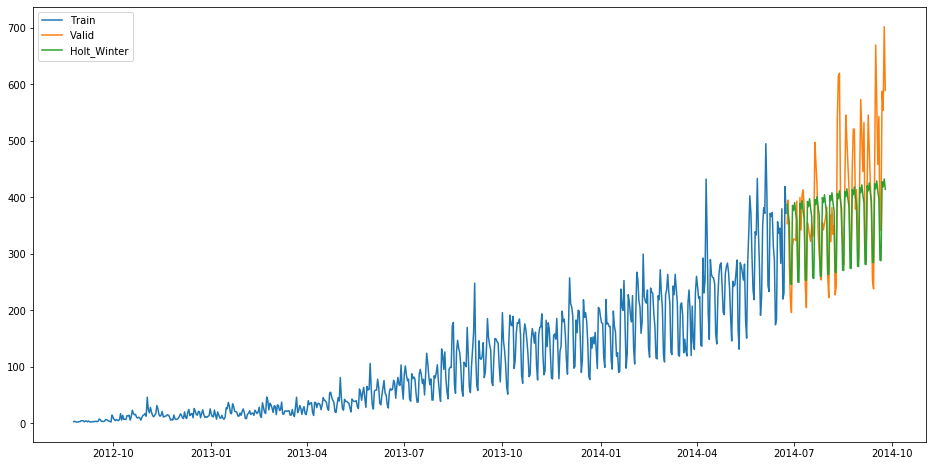

In [195]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7, trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [196]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['Holt_Winter']))
rmse

82.37571191747172

We can see that the rmse value has reduced a lot from this method. Let's forecast the Counts for the entire length of test set 

In [0]:
predict = fit1.forecast(len(test))

In [0]:
test['predict'] = predict


In [199]:
test

,ID,year,month,day,hour,predict
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,387.359995
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,369.135921
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,355.563302
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,247.088754
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,246.192644
...,...,...,...,...,...,...
2015-04-22,23291.5,2015.0,4.0,22.0,11.5,487.205492
2015-04-23,23315.5,2015.0,4.0,23.0,11.5,478.128158
2015-04-24,23339.5,2015.0,4.0,24.0,11.5,492.180473


In [0]:
# Merge test and test_original on day, month and year 

merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left')
merge['hour'] = merge['hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis=1)

In [201]:
temp2

,hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [0]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left')

# Converting the ratio to the original scale
prediction['Count']=prediction['predict']*prediction['ratio']*24

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','predict', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

Till now we have made different models for trend and seasonality. Can’t we make a model which will consider both the trend and seasonality of the time series?

Yes we can. We will look at the ARIMA model for time series forecasting.

### ARIMA MODEL
  - Auto Regression Integrated Moving Average
  - It is specified by three parameters (p,d,q)
  - Here, p is the order of the autoregressive model (number of time lags)
  - d is the degree of differencing (no. of times the data have had passed values subtracted) 
  - q is the order of moving average model 
  
The ARIMA forecasting for a stationary time series is nothing but a linear (like linear regression) equation

#### Stationary time series 
There are three basic requirements for a time series to be stationary:
  - The mean of the time series should not be a function of time. It should be a constant.
  - The variance of the time series should not be a function of time 
  - The covariance of the ith term and the (i+m)th term should not be a function of time. 

#### Why should the time series be stationary?
We make the time series stationary so that the variables become independent

### Parameter Tuning for ARIMA model 

#### Stationarity check 

  - Dickey Fuller test is used to check stationarit of a time series 
  - The intuition behind this test is that time series is that it determines how strongly a time series is defined by a trend
  - The null hypothesis is that the time series is not stationary(there is some trend in the data)
  - The alternative hypothesis is that the time series is stationary

The test results comprise of a Test Statistic and a Critical Value. 
If the Test Statistic is less than the Critical Value, then we can reject the null hypothesis (time series is stationary) and vice versa.

In [0]:
# function to calculate the results of dickey-fuller test 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
  # Determining rolling statistics 
  rolmean = pd.Series(timeseries).rolling(window=24).mean()   # 24 hours a day
  rolstd = pd.Series(timeseries).rolling(window=24).std()

  # Plot rolling statistics 
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling mean and standard deviation')
  plt.show(block=False)

  # Perform Dickey-Fuller test :
  print('Results of Dickey-Fuller test')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# of lags used', 'N# of observations used '])

  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


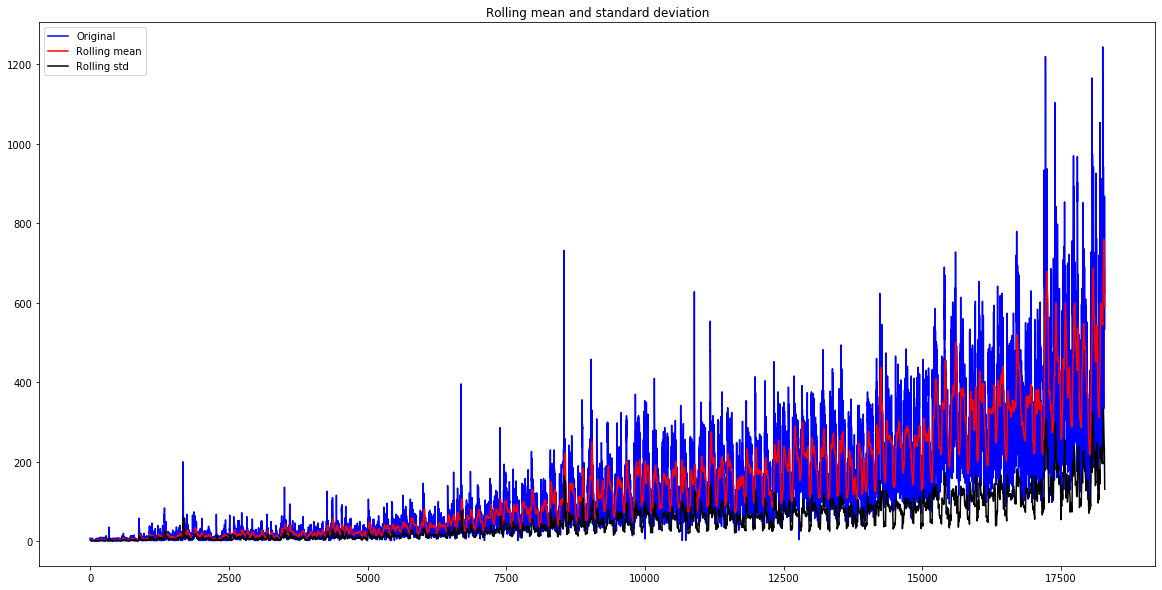

Results of Dickey-Fuller test
Test Statistic                 -4.456561
p-value                         0.000235
# of lags used                 45.000000
N# of observations used     18242.000000
Critical Value (1%)            -3.430709
Critical Value (5%)            -2.861698
Critical Value (10%)           -2.566854
dtype: float64


In [204]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])

The statistics show that the time series is stationary because Test Statistic < Critical Value but we can see an increasing trend in the data. We will try to make the series more stationary. For doing so, we will remove the trend and seasonality from the data.

#### Removing Trend

A trend exists when there is a long term increase or decrease in the data. It does not have to be linear. We can see an increasing trend in our data, so we will apply a transformation that penalizes higher values than smaller values (log-transformation)

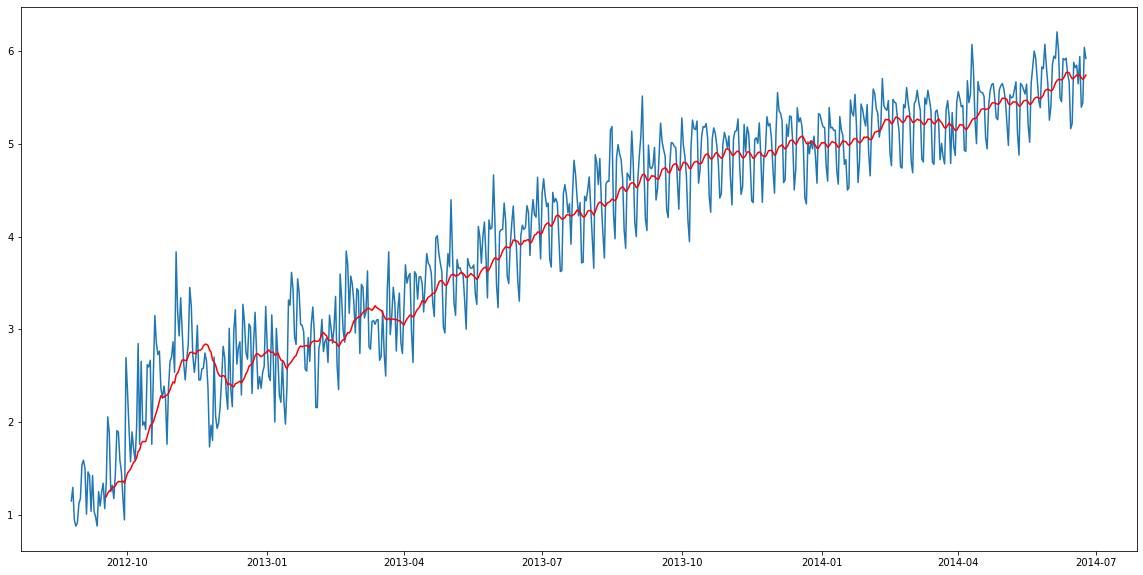

In [205]:
Train_log = np.log(Train['Count'])
valid_log = np.log(valid['Count'])

moving_avg = pd.Series(Train_log).rolling(window=24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color='red')
plt.show()

We can see an increasing trend. We will remove this trend to make the series stationary.


In [206]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff

Datetime
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29         NaN
                ...   
2014-06-20    0.200295
2014-06-21   -0.317381
2014-06-22   -0.253342
2014-06-23    0.326990
2014-06-24    0.179745
Freq: D, Name: Count, Length: 669, dtype: float64

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So, let us drop those values.

In [0]:
train_log_moving_avg_diff.dropna(inplace=True)


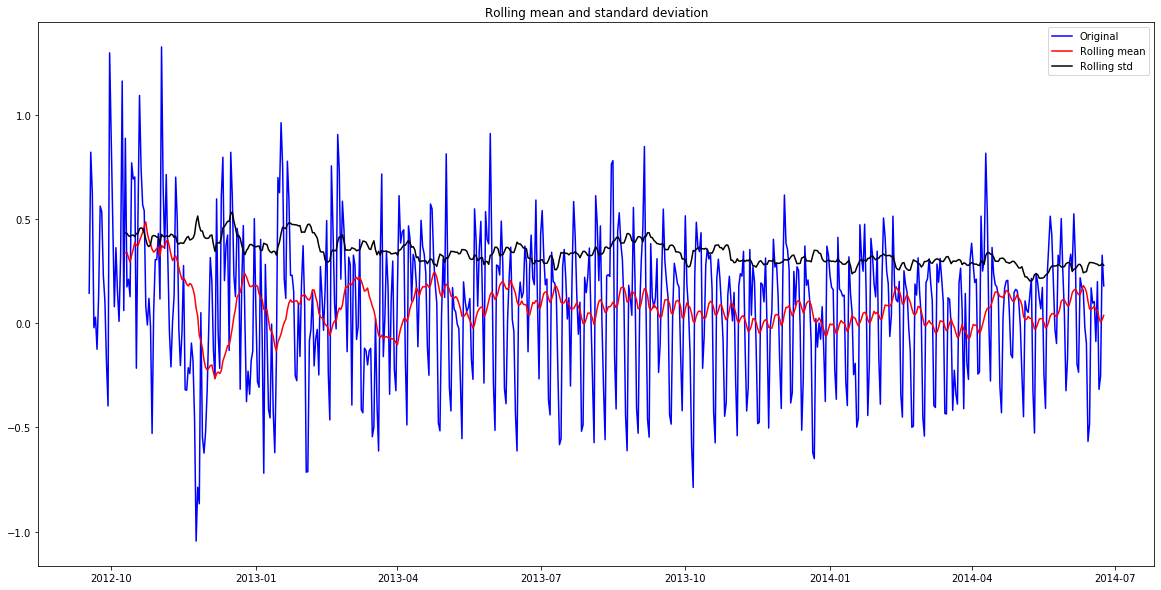

Results of Dickey-Fuller test
Test Statistic             -5.861646e+00
p-value                     3.399422e-07
# of lags used              2.000000e+01
N# of observations used     6.250000e+02
Critical Value (1%)        -3.440856e+00
Critical Value (5%)        -2.866175e+00
Critical Value (10%)       -2.569239e+00
dtype: float64


In [208]:
test_stationarity(train_log_moving_avg_diff)

We can see that the test statistic is very small compared to the critical value. So we can be confident in declaring the timeseries as stationary and the trend has been removed.
Let's now stabilize the mean which is one of the conditions of stationarity. Differencing can help eliminate the trend and make the series stationary.


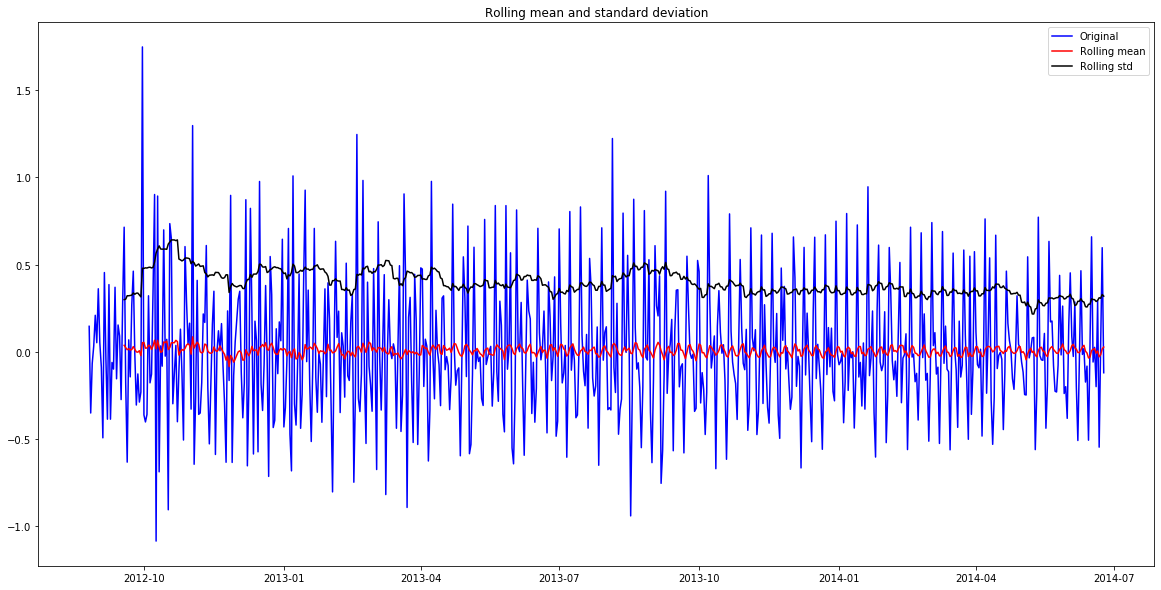

Results of Dickey-Fuller test
Test Statistic             -8.237568e+00
p-value                     5.834049e-13
# of lags used              1.900000e+01
N# of observations used     6.480000e+02
Critical Value (1%)        -3.440482e+00
Critical Value (5%)        -2.866011e+00
Critical Value (10%)       -2.569151e+00
dtype: float64


In [209]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

#### Removing seasonality

- By seasonality, we mean periodic fluctuations. Eg: the quarter of a year, the month, the day of the week, etc.)


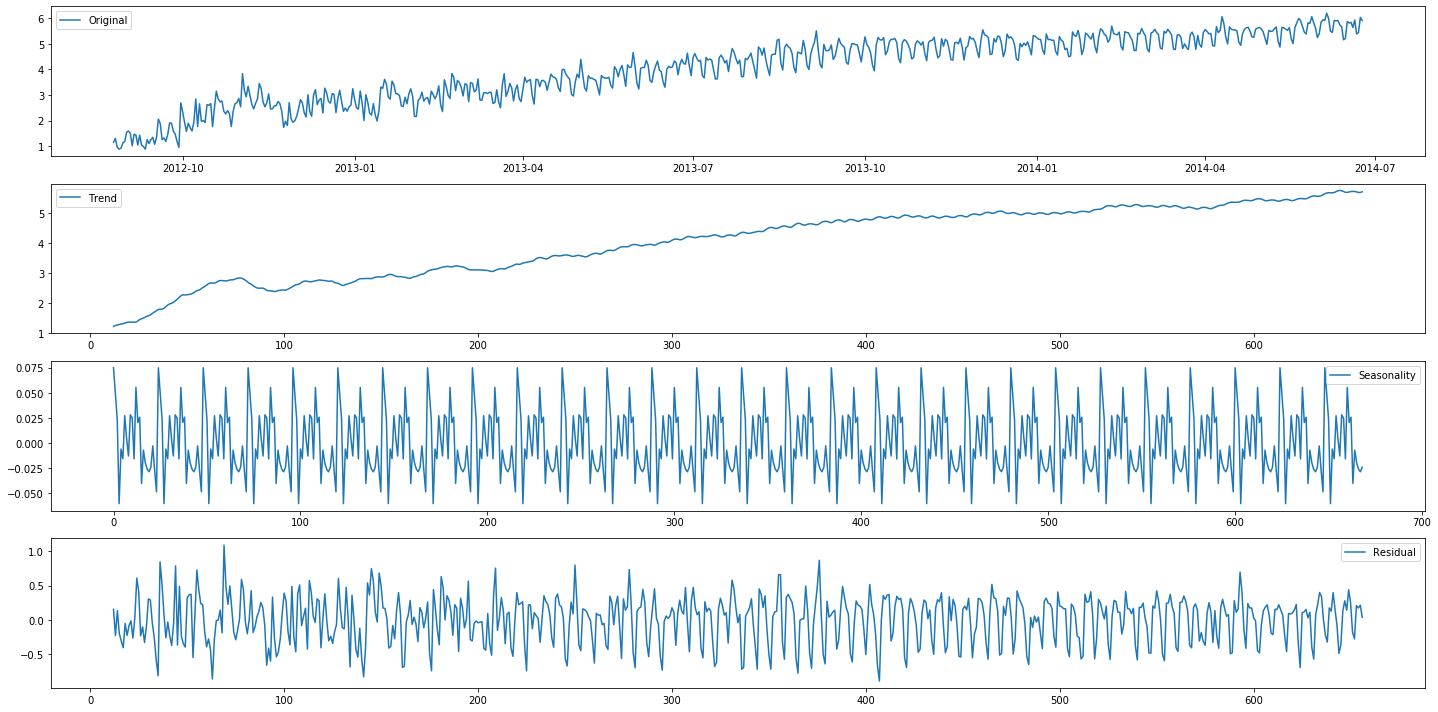

In [211]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq=24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid 

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Let's check the stationarity of residuals

In [216]:
residual

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.15362828, -0.22816371,  0.13368141,
       -0.20148817, -0.30987512, -0.40806445, -0.05315446, -0.22729519,
       -0.0851205 , -0.01460091, -0.26635862,  0.03572507,  0.61125739,
        0.40923038, -0.23375593, -0.10274033, -0.33044545, -0.08910408,
        0.30622613,  0.29147564, -0.04621915, -0.25548098, -0.58175138,
       -0.81671475,  0.84801035,  0.5218029 ,  0.08578194, -0.26170544,
       -0.03085791, -0.233423  , -0.37300098, -0.05542746,  0.78958003,
       -0.3684589 ,  0.48951399, -0.23894852, -0.34854483, -0.39727501,
        0.3201405 ,  0.36841583,  0.3722054 , -0.55229039,  0.09741196,
        0.72868938,  0.43636027,  0.23602876,  0.22225323, -0.16847932,
       -0.39465015, -0.27942566, -0.42869284, -0.865154  , -0.29197028,
       -0.01254192, -0.00273171,  0.14241412, -0.18956148,  1.09

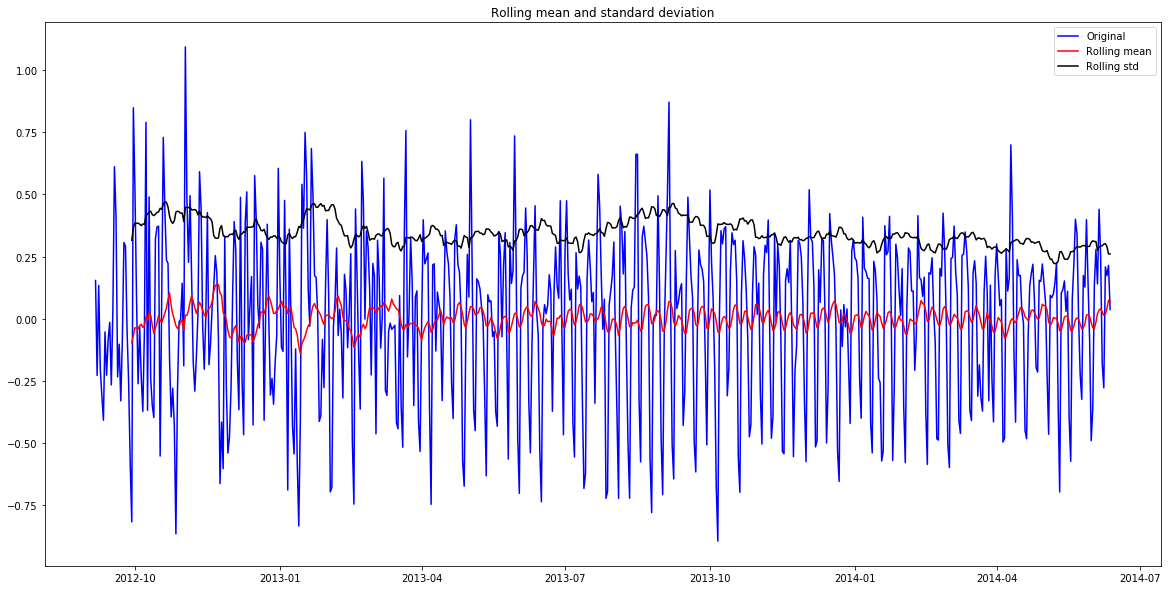

Results of Dickey-Fuller test
Test Statistic             -7.822096e+00
p-value                     6.628321e-12
# of lags used              2.000000e+01
N# of observations used     6.240000e+02
Critical Value (1%)        -3.440873e+00
Critical Value (5%)        -2.866183e+00
Critical Value (10%)       -2.569243e+00
dtype: float64


In [217]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

It can be inferred that the residuals are stationary.
We will forecast the time series using different models 

### Forecasting using ARIMA

- First, we will fit the ARIMA model to our timeseries. For that, we need to find optimal values for p,d,q.
- To find the optimized values of p,d,q, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation function) graph.
- ACF is the measure of correlation between the timeseries with a lagged version of itself.
- PACF is the measure of the correlation between the timeseries and a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.



In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')


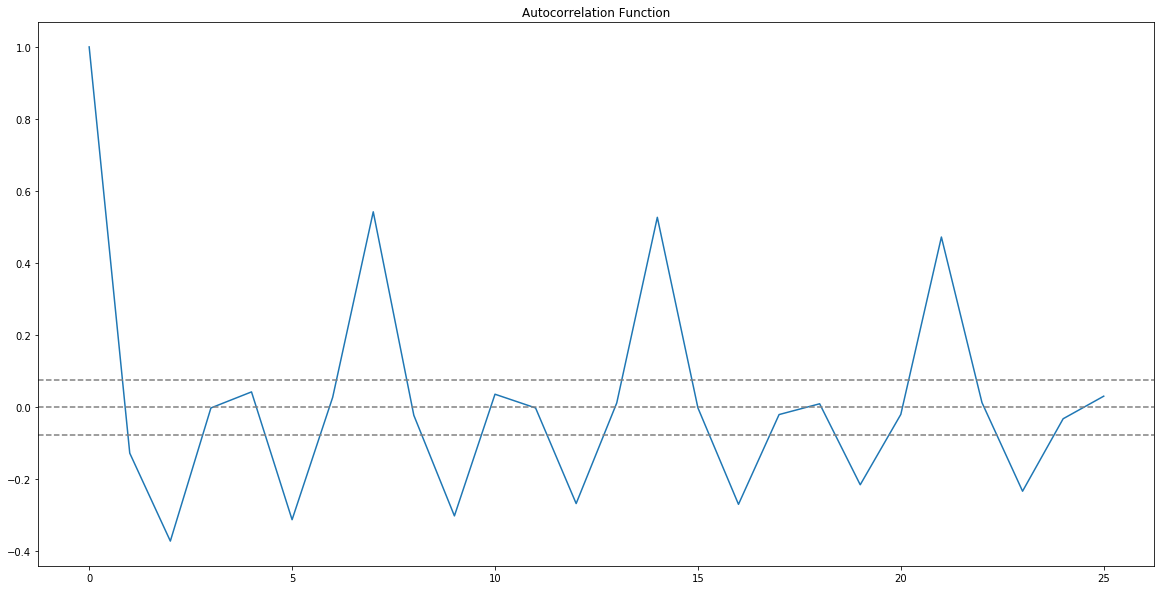

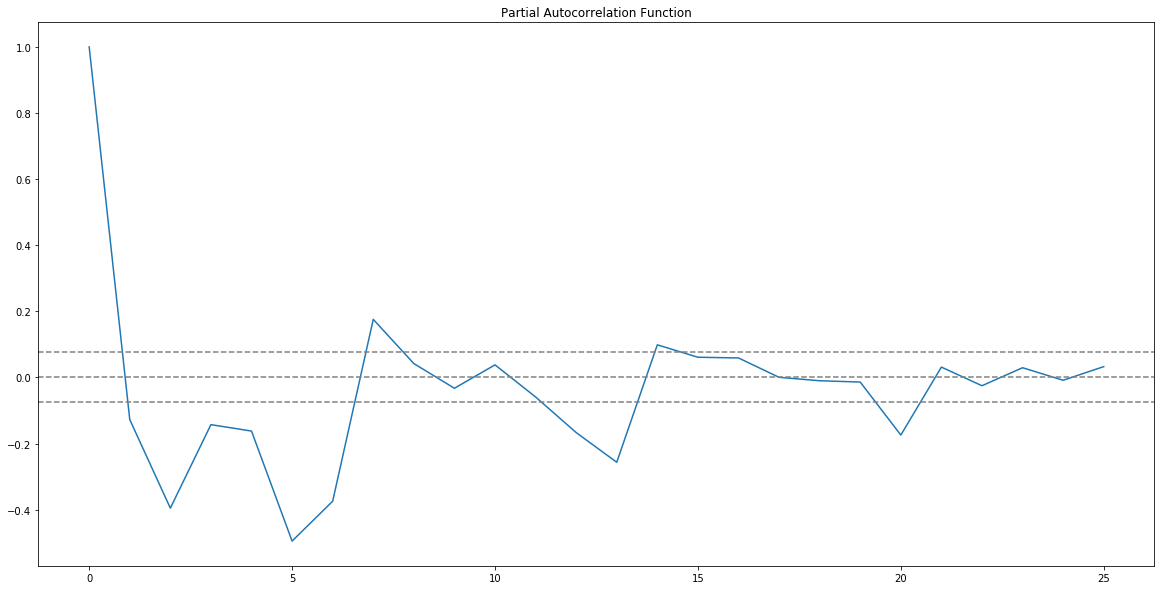

In [224]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

#### AR model

The autoregressive model specifies that the output variable depends linearly on its own previous values.

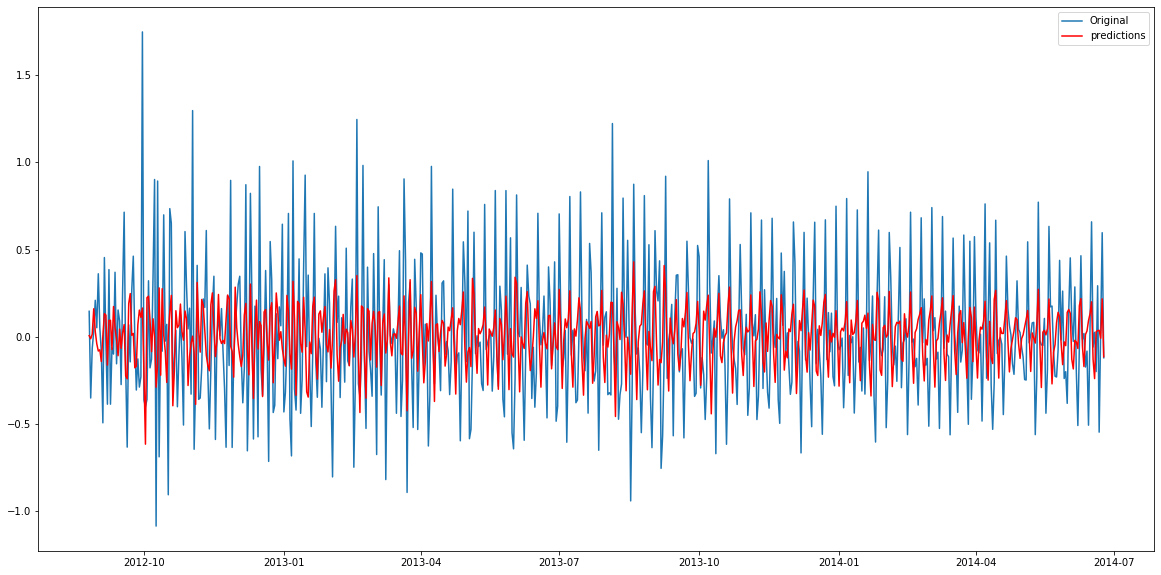

In [225]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(Train_log, order=(2,1,0))    # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.show()

Let's plot the validation curve for the AR model 
We have to change the scaled of the model to the original scale.
First step would be to store the predicted results in a separate series and obseve it. 


In [0]:
AR_predict = results_AR.predict(start='2014-06-25', end='2014-09-25')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0], index=valid.index)
AR_predict1 = AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

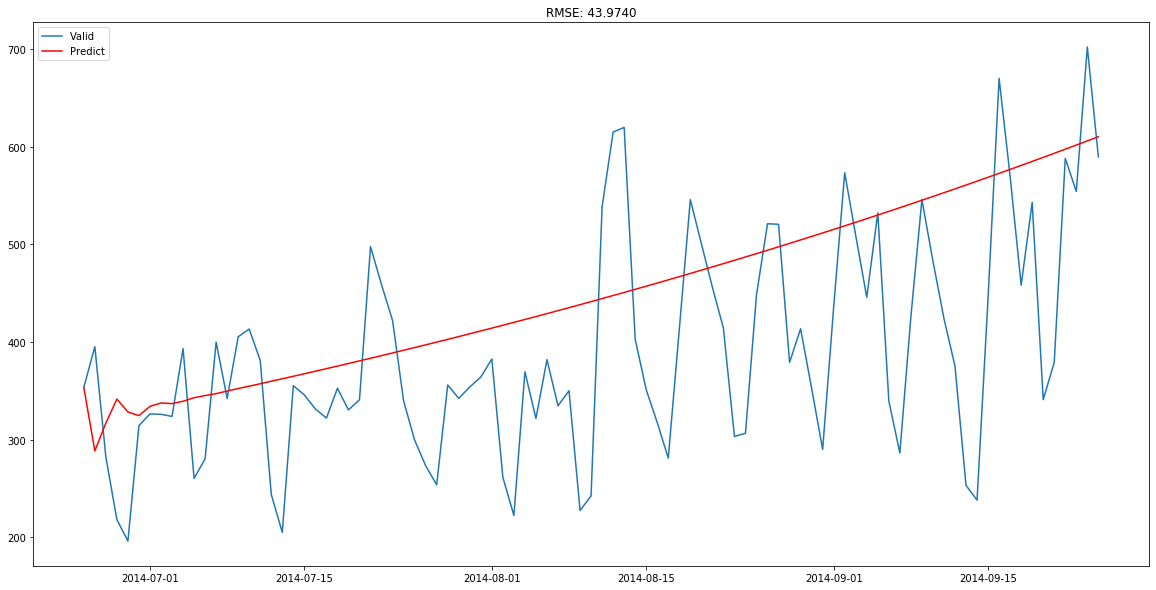

In [228]:
plt.plot(valid['Count'], label='Valid')
plt.plot(AR_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

Here the red line shows the prediction for the validation set. Let’s build the MA model now.


#### MA model
The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.


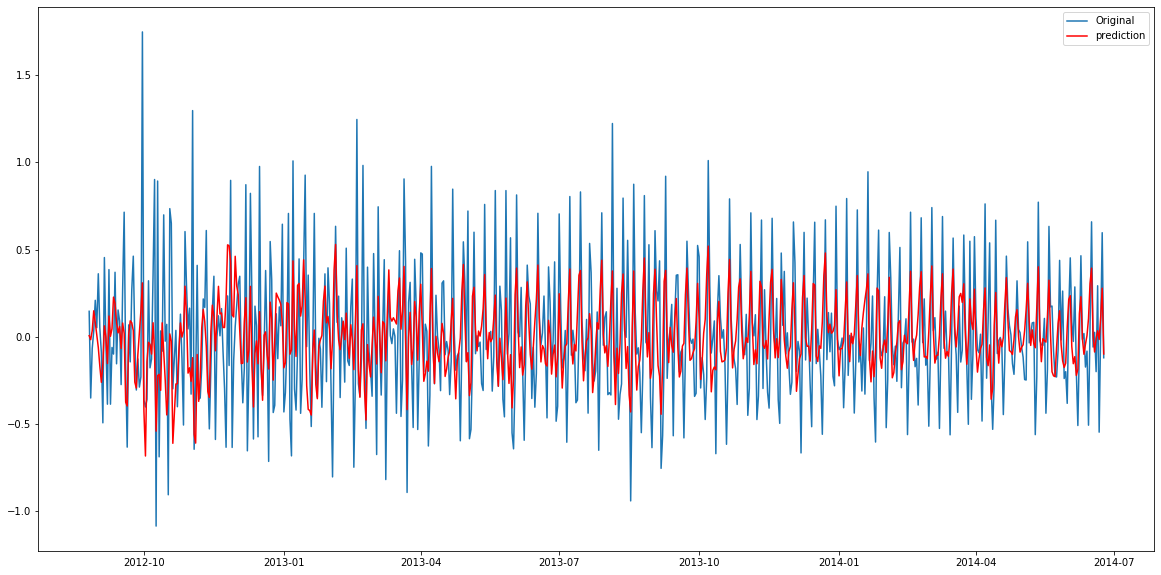

In [229]:
model = ARIMA(Train_log, order=(0,1,2))    # Here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label='Original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

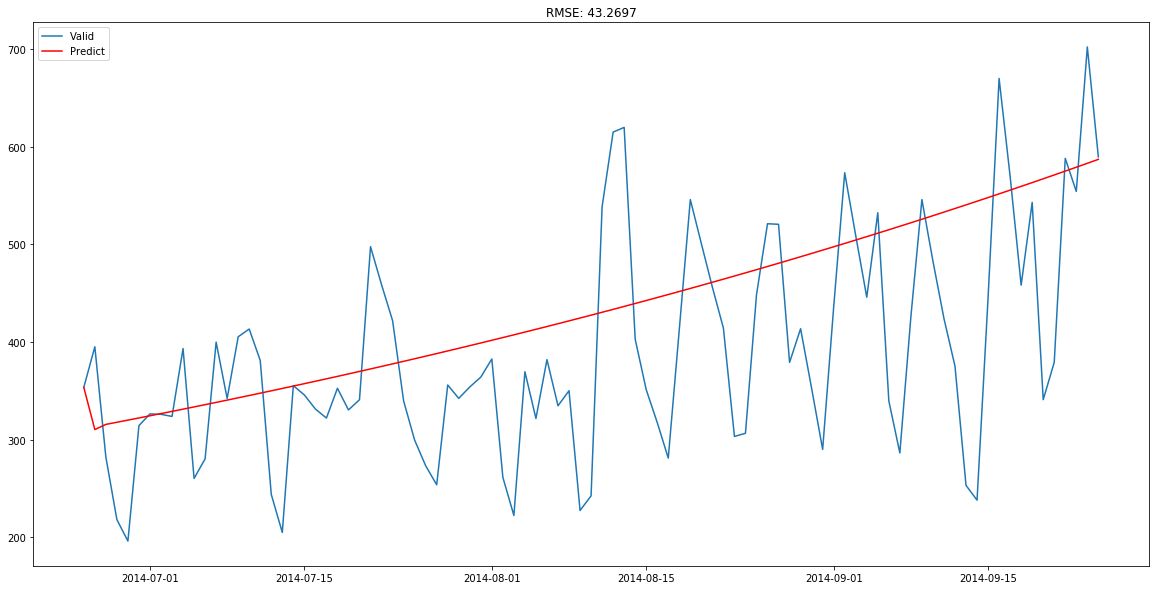

In [234]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0])) 
plt.show()

Now lets combine these two models 

#### Combined model

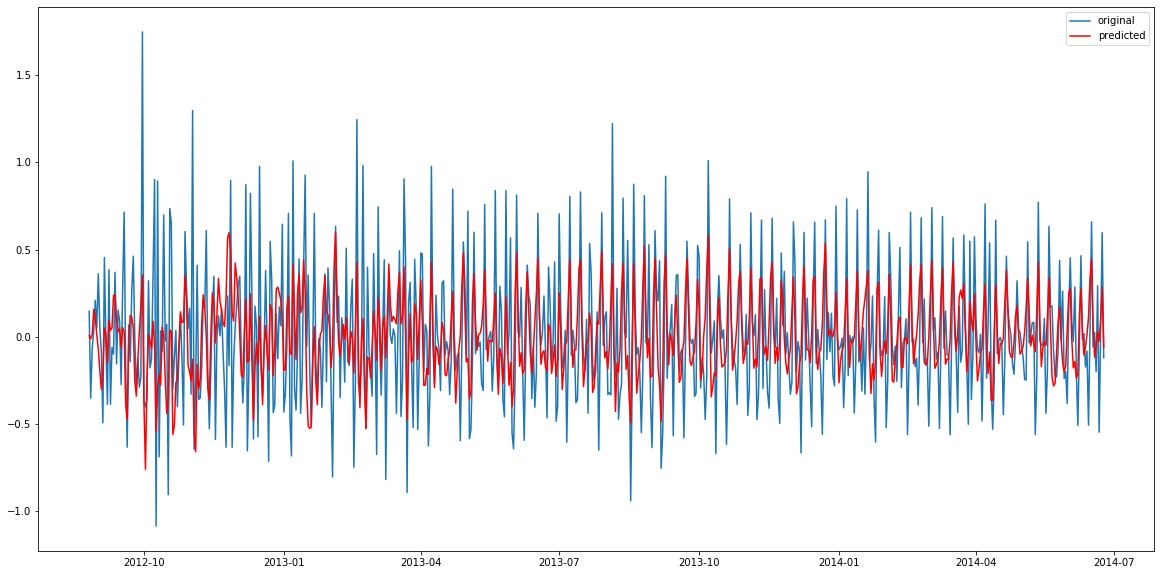

In [235]:
model = ARIMA(Train_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted')
plt.legend(loc='best')
plt.show()

Let’s define a function which can be used to change the scale of the model to the original scale.

In [0]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

Lets predict the values for the validation set

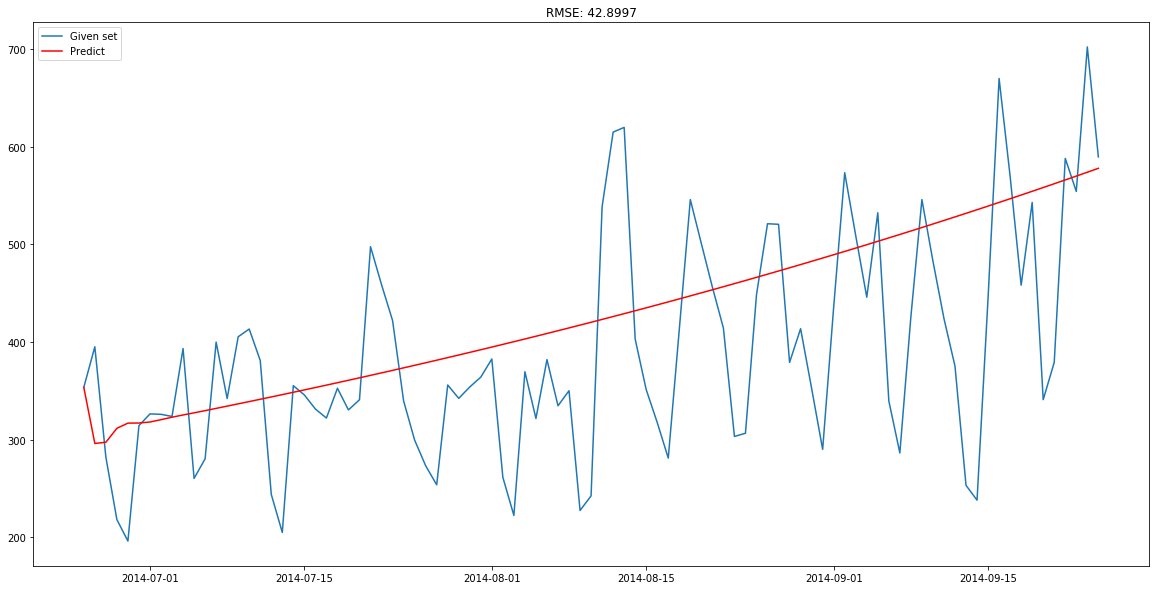

In [237]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

### SARIMAX model on daily time series 

SARIMAX takes into account the seasonality of the time series.

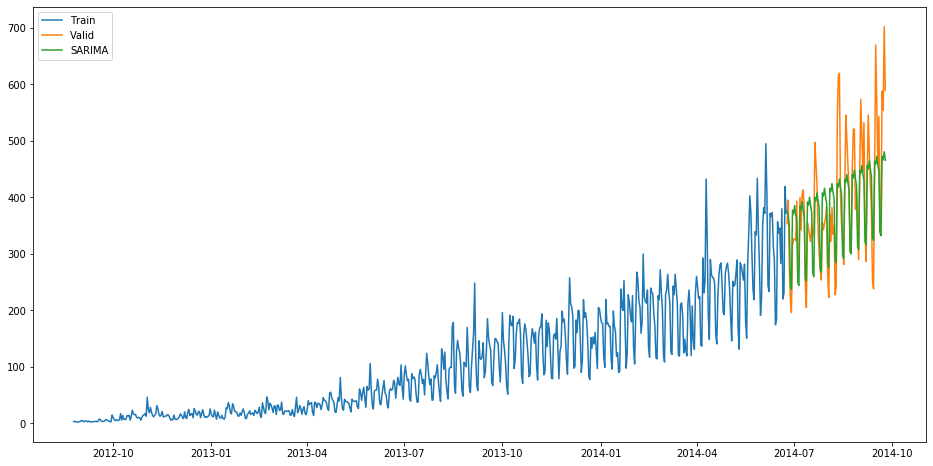

In [238]:
import statsmodels.api as sm

y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start='2014-6-25', end='2014-9-25', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

- Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [241]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
rmse

69.88508448051837

Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at 2015-4-26.

In [0]:
predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [0]:
test['prediction']=predict
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['hour']=merge['hour_y'] 
merge=merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'], axis=1) 


# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='hour', how='left') 

# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')